# Telecome Churn Prediction

<img src="https://www.telecom.com.fj/wp-content/uploads/2019/08/corporate-768x432.jpg" />

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
mpl.style.use(['Solarize_Light2'])

In [3]:
pwd

'C:\\Users\\ellaa\\Documents\\BDA14\\Python\\Python Project'

In [4]:
path = "C:\\Users\\ellaa\\Documents\\BDA14\\Python\\Python Project"

In [5]:
churn = pd.read_csv("%s/churn.csv" % path)
pd.set_option('display.max_rows', 10) 
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
churn.shape

(7043, 21)

7043 examples and 21 columns (20 features\variables and one label)

In [7]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
                     ...   
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
Length: 21, dtype: object

#### Columns
 
Those the descriptions of the variables in this dataset:

<table>
    <tr><th> CustomerID </th><td> CustomerID </td></tr>
    <tr><th> Gender </th><td> Male or Female </td></tr>
    <tr><th> SeniorCitizen </th><td> Seniorcitizen or not </td></tr>
    <tr><th> Partner </th><td> Customer has a partner or not </td></tr>
    <tr><th> Dependents </th><td> Customer has dependents or not </td></tr>
    <tr><th> tenure </th><td> Number of months the customer has stayed with the company </td></tr>
    <tr><th> PhoneService </th><td> Customer has a PhoneService or not </td></tr>
    <tr><th> MultipleLines </th><td> Customer has MultipleLines or not </td></tr>
    <tr><th> InternetService </th><td> Customer's internet service provider </td></tr>
    <tr><th> OnlineSecurity </th><td> Customer has OnlineSecurity or not </td></tr>
    <tr><th> OnlineBackup </th><td> Customer has OnlineBackup or not </td></tr>
    <tr><th> DeviceProtection </th><td> Customer has DeviceProtection or not </td></tr>
    <tr><th> TechSupport </th><td> Customer has TechSupport or not </td></tr>
    <tr><th> StreamingTV </th><td> Customer has StreamingTV or not </td></tr>
    <tr><th> StreamingMovies </th><td> Customer has StreamingMovies or not </td></tr>
    <tr><th> Contract </th><td> The contract term of the customer </td></tr>
    <tr><th> PaperlessBilling </th><td> Customer has PaperlessBilling or not </td></tr>
    <tr><th> PaymentMethod </th><td> The customer's payment method </td></tr>
    <tr><th> MonthlyCharges </th><td> The amount charged to the customer monthly </td></tr>
    <tr><th> TotalCharges </th><td> The total amount charged to the customer </td></tr>
    <tr><th> Churn </th><td> Customer churned or not </td></tr>
    
</table>

In [8]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Customers Churn
 
Number of customers in the company's dataset and how many of them churned

In [9]:
churn.customerID.is_unique

True

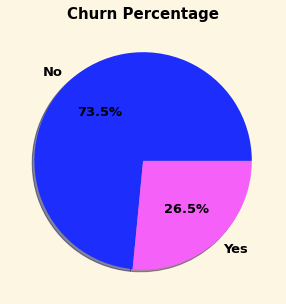

In [10]:
count = churn['Churn'].value_counts(sort = True)
colors = ["#1C2DFC","#F560F9"] 
labels=['No','Yes']
plt.figure(figsize=(5,5))
plt.pie(count,labels=labels,textprops=dict(color="black",fontsize= 13,fontweight='bold'), colors=colors,autopct='%1.1f%%', shadow=True)
plt.title('Churn Percentage', fontdict={'fontsize':15, 'fontweight':'bold'})
plt.show()

#### Churn (label) distribution

In [11]:
churn.loc[churn.Churn == 'No', 'Churn'] = 0
churn.loc[churn.Churn == 'Yes', 'Churn'] = 1
churn = churn.astype({"Churn": 'int64'})

customers = len(churn)
churned = sum(churn['Churn'])

print("The Company has %d customers, %d of them churned (%f%%)" % (customers, churned, (churned/customers*100)))

The Company has 7043 customers, 1869 of them churned (26.536987%)


In [12]:
churn['Churn'].describe()

count    7043.000000
mean        0.265370
std         0.441561
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

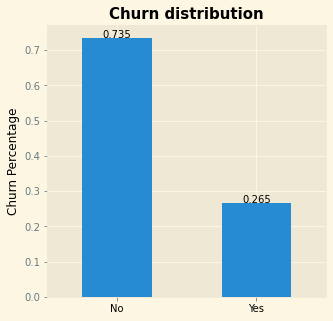

0    0.73463
1    0.26537
Name: Churn, dtype: float64

In [13]:
fig, ax = plt.subplots(figsize=(5,5))

churn.Churn.value_counts(normalize=True).plot(kind='bar')
plt.ylabel("Churn Percentage",color='black')
ax.set_xticklabels(["No", "Yes"],rotation=0,color='black')

x=churn['Churn'].value_counts(normalize=True).index.tolist()
y=churn['Churn'].value_counts(normalize=True)

for i in range(len(x)):
    ax.text(i, (y[i]), "{:.3f}".format(y[i]), ha = 'center')

    
plt.title("Churn distribution", fontdict={'fontsize':15, 'fontweight':'bold'})

plt.show()

churn.Churn.value_counts(normalize=True)

#### Missing values

In [14]:
churn = churn.replace(' ', np.nan)  
churn.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
                    ..
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
Length: 21, dtype: int64

In [15]:
churn.loc[churn.TotalCharges.isna(),"tenure"]

488     0
753     0
936     0
1082    0
1340    0
       ..
3826    0
4380    0
5218    0
6670    0
6754    0
Name: tenure, Length: 11, dtype: int64

All missing values in total charges have tenure 0, which means they are new customers.
For that reason, we fill them with monthly charges.

In [16]:
churn.loc[churn.TotalCharges.isna(),'TotalCharges'] = churn["MonthlyCharges"]
churn = churn.astype({"TotalCharges": 'float'})

#Insert customerID into a variable for the ML step before dropping it.
custid=churn['customerID']

churn = churn.drop(['customerID'], axis=1)
churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
                     ...   
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
Length: 20, dtype: object

#### Cleaning Data

In [17]:
for column in churn:
    if churn[column].dtypes=='object':
        print(f'{column}: {churn[column].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [18]:
churn.replace('No internet service','No',inplace=True)
churn.replace('No phone service','No',inplace=True)

In [19]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
for column in yes_no_columns:
    churn[column].replace({'Yes': 1,'No': 0},inplace=True)
churn.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
                     ...   
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
Length: 20, dtype: object

In [20]:
churn.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
                   ..
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Length: 20, dtype: int64

No missing values

In [21]:
#Before correlation -  saving churn DF as is for ML step
churn_ml=pd.DataFrame(churn)

In [22]:
churn_corr = pd.get_dummies(churn)
churn_corr

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,0,1,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,1,1,72,1,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
7040,0,1,1,11,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,0,4,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [23]:
churn_corr.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,...,0.343746,0.439585,0.216669,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,...,0.474991,0.496372,0.412004,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
churn_corr[['tenure','TotalCharges','MonthlyCharges','gender_Male','gender_Female']].describe()

,tenure,TotalCharges,MonthlyCharges,gender_Male,gender_Female
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,2279.798992,64.761692,0.504756,0.495244
std,24.559481,2266.730170,30.090047,0.500013,0.500013
min,0.000000,18.800000,18.250000,0.000000,0.000000
25%,9.000000,398.550000,35.500000,0.000000,0.000000
50%,29.000000,1394.550000,70.350000,1.000000,0.000000
75%,55.000000,3786.600000,89.850000,1.000000,1.000000
max,72.000000,8684.800000,118.750000,1.000000,1.000000


<u><b>Drill down to the numerical values and gender in our data:</b></u><br>
1.Tenure column - the average tenure is 32.37 months, the most senior client has a tenure of 72 months and 25% of the customers have a tenure of 9 months or less. <br><br>
2.TotalCharges column - the average total charge is 2279.79 USD, the highest is 8684.8 USD, and 50% of customers paid the company 1394.55 USD or less during their membership.<br><br>
3.MonthlyCharges column - the average monthly charge is 64.76 USD, the maximum monthly charge is 118.75 USD, and 25% of customers paid 35.5 USD or less each month, with the lowest monthly charge being 18.25 USD.<br><br>
4.Sex_female and Sex_male columns - males and females are divided evenly in the gender distribution

### Correlation between Features - Finding relationships

In [25]:
churn_corr.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,-0.060625,...,-0.108322,0.255338,-0.182742,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,0.119999,...,-0.000851,0.000304,0.000615,-0.280865,0.082783,0.248091,0.110706,0.082029,-0.083852,-0.095125
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,0.063268,...,0.052010,-0.165818,0.139812,-0.231720,0.068368,0.204613,0.052021,0.060267,-0.150642,0.059071
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,0.324221,...,0.013274,0.019720,-0.039062,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,-0.096340,...,-0.452425,0.289999,0.172209,-0.000742,-0.002791,0.003519,0.007556,-0.007721,0.003062,-0.003319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Contract_Two year,-0.117000,0.248091,0.204613,0.558533,0.003519,0.106253,0.191773,0.111400,0.165096,0.240824,...,0.031714,-0.211526,0.218278,-0.622633,-0.289510,1.000000,0.154471,0.173265,-0.282138,-0.004705
PaymentMethod_Bank transfer (automatic),-0.016159,0.110706,0.052021,0.243510,0.007556,0.075527,0.095158,0.087004,0.083115,0.101252,...,0.025476,-0.022624,-0.002113,-0.179707,0.057451,0.154471,1.000000,-0.278215,-0.376762,-0.288685
PaymentMethod_Credit card (automatic),-0.024135,0.082029,0.060267,0.233006,-0.007721,0.060048,0.115721,0.090785,0.111554,0.117272,...,0.051438,-0.050077,0.001030,-0.204145,0.067589,0.173265,-0.278215,1.000000,-0.373322,-0.286049
PaymentMethod_Electronic check,0.171718,-0.083852,-0.150642,-0.208363,0.003062,0.083618,-0.112338,-0.000408,-0.003351,-0.114839,...,-0.104418,0.336410,-0.284917,0.331661,-0.109130,-0.282138,-0.376762,-0.373322,1.000000,-0.387372


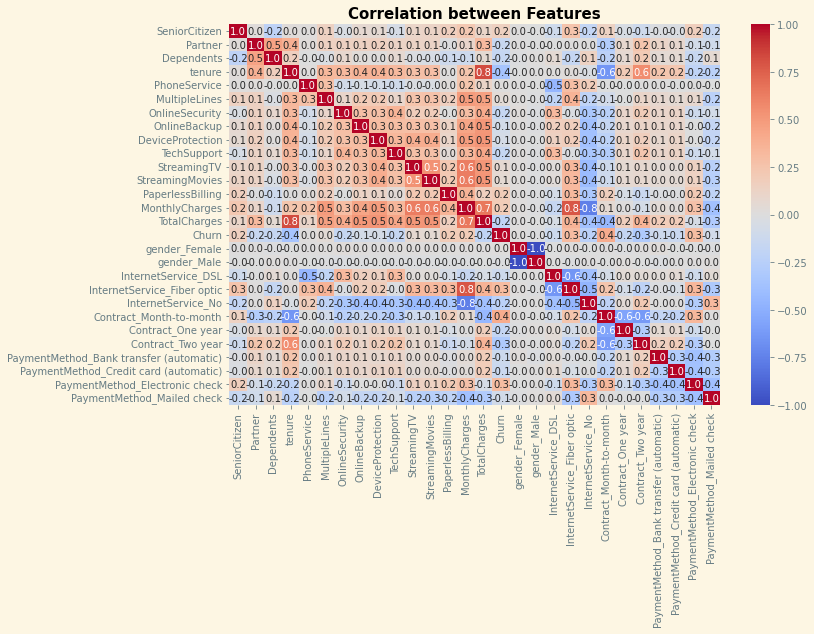

In [26]:
plt.figure(figsize = (11, 7))

sns.heatmap(churn_corr.corr(), cmap="coolwarm", annot=True, fmt=".1f")
plt.title("Correlation between Features", fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()

<u><b>Main correlations from the heatmap:</b></u><br>
1.The relationship between tenure and churn is (-0.4)- it means that if tenure increases, churn will probably decrease.

2.The relationship between a month-to-month contract and churn is (0.4) - It means that an increase in the number of customers on a month-to-month contract will result in an increase in churn.

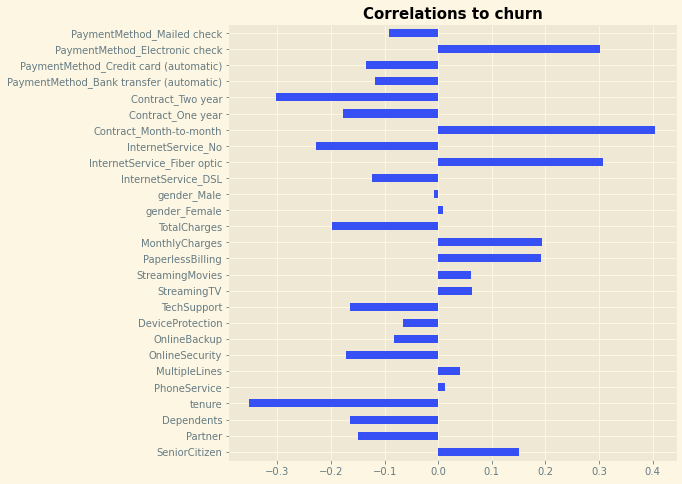

In [27]:
plt.figure(figsize=(8,8))
churn_corr.corr()['Churn'].drop('Churn').plot(kind='barh', color="#3650F5")
plt.title("Correlations to churn", fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()

Some features have strong correlations. Drill-down on the main ones, tenure and contract type - month to month, will be shown in the following steps.

### Demographic Features

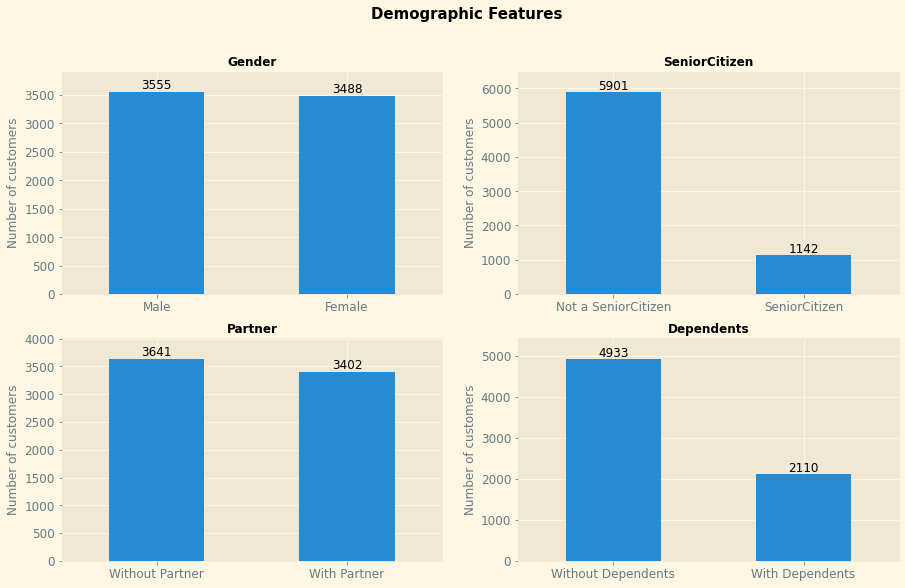

In [28]:
plt.figure(figsize=(15,9))
plt.rcParams['font.size'] = '12'

#Gender
plt.subplot(2, 2, 1)
churn['gender'].value_counts().plot(kind='bar',rot=0)

x=churn['gender'].value_counts().index.tolist()
y=churn['gender'].value_counts()

for i in range(len(x)):
    plt.text(i, (y[i]+60), y[i], ha = 'center')

plt.margins(0,0.1)
plt.ylabel("Number of customers")
plt.title("Gender",fontsize=12,fontweight='bold')

#SeniorCitizen
ax = plt.subplot(2, 2, 2)
churn['SeniorCitizen'].value_counts().plot(kind='bar',rot=0)

x=churn['SeniorCitizen'].value_counts().index.tolist()
y=churn['SeniorCitizen'].value_counts()

for i in range(len(x)):
    plt.text(i, (y[i]+60), y[i], ha = 'center')

plt.margins(0,0.1)
plt.ylabel("Number of customers")
ax.set_xticklabels(["Not a SeniorCitizen", "SeniorCitizen"])
plt.title("SeniorCitizen",fontsize=12,fontweight='bold')

#Partner
ax = plt.subplot(2,2,3)
churn['Partner'].value_counts().plot(kind='bar',rot=0)

x=churn['Partner'].value_counts().index.tolist()
y=churn['Partner'].value_counts()

for i in range(len(x)):
    plt.text(i, (y[i]+60), y[i], ha = 'center')

plt.margins(0,0.1)
plt.ylabel("Number of customers")
ax.set_xticklabels(["Without Partner", "With Partner"])
plt.title("Partner",fontsize=12,fontweight='bold')

#Dependents
ax = plt.subplot(2,2,4)
churn['Dependents'].value_counts().plot(kind='bar',rot=0)

x=churn['Dependents'].value_counts().index.tolist()
y=churn['Dependents'].value_counts()

for i in range(len(x)):
    plt.text(i, (y[i]+60), y[i], ha = 'center')

plt.margins(0,0.1)
plt.ylabel("Number of customers")
ax.set_xticklabels(["Without Dependents", "With Dependents"])
plt.title("Dependents",fontsize=12,fontweight='bold')


plt.suptitle('Demographic Features',fontsize=15,fontweight='bold')
plt.show()

#### Gender

In [29]:
y=churn['gender'].value_counts()

print("The Company has %d customers, %d of them Male (%f%%) and %d of them Female(%f%%)"
      % (y['Male']+y['Female'], y['Male'],y['Male']/(y['Male']+y['Female'])*100, y['Female'],y['Female']/(y['Male']+y['Female'])*100))

The Company has 7043 customers, 3555 of them Male (50.475650%) and 3488 of them Female(49.524350%)


#### Senior Citizens

In [30]:
y=churn['SeniorCitizen'].value_counts()

print("The Company has %d customers, %d of them are SeniorCitizen (%f%%)"% (y[1]+y[0], y[1],y[1]/(y[0]+y[1])*100))

The Company has 7043 customers, 1142 of them are SeniorCitizen (16.214681%)


#### Partner

In [31]:
y=churn['Partner'].value_counts()


print("The Company has %d customers, %d of them have Partner (%f%%)"% (y[1]+y[0], y[1],y[1]/(y[0]+y[1])*100))

The Company has 7043 customers, 3402 of them have Partner (48.303280%)


#### Dependents

In [32]:
y=churn['Dependents'].value_counts()

print("The Company has %d customers, %d of them have Dependents (%f%%)"% (y[1]+y[0], y[1],y[1]/(y[0]+y[1])*100))

The Company has 7043 customers, 2110 of them have Dependents (29.958824%)


##### New feature - Living alone vs with family

In [33]:
churn['LivingAlone'] = 0
churn.loc[(churn['Partner']==0) & (churn['Dependents']==0),'LivingAlone'] = 1

churn.groupby('LivingAlone').agg({'Churn':['count',sum,'mean']})

Churn                
            count   sum      mean
LivingAlone                      
0            3763   746  0.198246
1            3280  1123  0.342378

Customers who lives alone are more likely to churn

### Churn distribution by Demographic features

##### Gender

In [34]:
churn.groupby('gender').agg({'Churn':['count','sum','mean']})

Churn               
       count  sum      mean
gender                     
Female  3488  939  0.269209
Male    3555  930  0.261603

It seems that the churn is evenly distributed between genders and equals the overall mean.

Compared to the general "mean" - the chance to churn<br>
<br>
Gender	            mean<br>
female  -->    	0.269209<br>
male    -->    	0.261603<br>
both    -->       0.26537<br>
<br>

##### Senior Citizens

In [35]:
churn.groupby('SeniorCitizen').agg({'Churn':['count','sum','mean']})

Churn                
              count   sum      mean
SeniorCitizen                      
0              5901  1393  0.236062
1              1142   476  0.416813

SeniorCitizen are only 16% of customers, but they have a much higher churn rate: 42% against 23% for non-senior customers. 

#### Churn distribution mix with Gender and SeniorCitizen

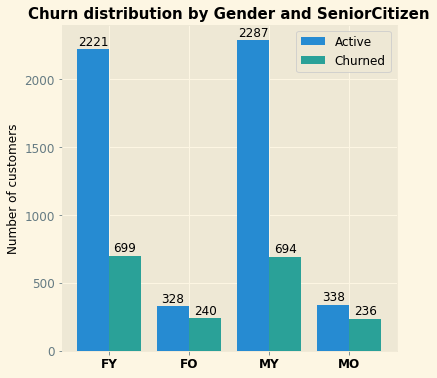

In [36]:
dataSet={}
dataSet["FY"]=churn.loc[(churn['gender']=='Female') & (churn['SeniorCitizen']==0),'Churn'].value_counts()
dataSet["FO"]=churn.loc[(churn['gender']=='Female') & (churn['SeniorCitizen']==1),'Churn'].value_counts()
dataSet["MY"]=churn.loc[(churn['gender']=='Male') & (churn['SeniorCitizen']==0),'Churn'].value_counts()
dataSet["MO"]=churn.loc[(churn['gender']=='Male') & (churn['SeniorCitizen']==1),'Churn'].value_counts()


GS = {"Active":[],"Churned":[]}

for key in dataSet:
    GS['Active'].append(dataSet[key][0])
    GS['Churned'].append(dataSet[key][1])

gs_df = pd.DataFrame.from_dict(GS)

index = np.arange(4)
bar_width=0.4

fig, ax = plt.subplots(figsize=(6,6))
ax.bar(index, gs_df['Active'], bar_width,label="Active")
ax.bar(index+bar_width, gs_df['Churned'],bar_width, label="Churned")


ax.set_ylabel('Number of customers',color='black')
ax.set_title('Churn distribution by Gender and SeniorCitizen',fontdict={'fontsize':15,'fontweight':'bold'})
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(dataSet.keys(),color='black',fontweight='bold')
ax.legend()

x=gs_df['Active'].value_counts().index.tolist()
y=gs_df['Churned'].value_counts().index.tolist()

for i in range(len(x)):
    ax.text(i, x[i]+30, x[i], ha = 'center')
    ax.text(i+bar_width, y[i]+30, y[i], ha = 'center')
    

plt.show()


Combining both features, gender and SeniorCitizen,leads us to conclude that the young generation (SeniorCitizen = 0) has a higher churn rate.

Gender is not a paramount feature

##### Partner

In [37]:
churn.groupby('Partner').agg({'Churn':['count','sum','mean']})

Churn                
        count   sum      mean
Partner                      
0        3641  1200  0.329580
1        3402   669  0.196649

Customers with a partner are much less likely to cancel their service

##### Dependents

In [38]:
churn.groupby('Dependents').agg({'Churn':['count','sum','mean']})

Churn                
           count   sum      mean
Dependents                      
0           4933  1543  0.312791
1           2110   326  0.154502

Customers without dependents are much likely to cancel their service

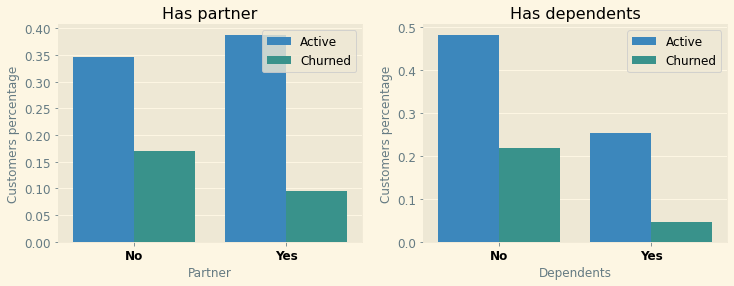

In [39]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "Customers percentage"
labels=["Active","Churned"]

# Plot Partner column
gp_partner = churn.groupby('Partner')["Churn"].value_counts()/len(churn)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
ax.set_xticklabels(["No", "Yes"],color='black',fontweight='bold')
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels)

# Plot Dependents column

gp_dep = churn.groupby('Dependents')["Churn"].value_counts()/len(churn)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep,ax=axis[1])
ax.set_xticklabels(["No", "Yes"],color='black',fontweight='bold')
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels)


plt.show()

#### Churn distribution mix with Partner and Dependents

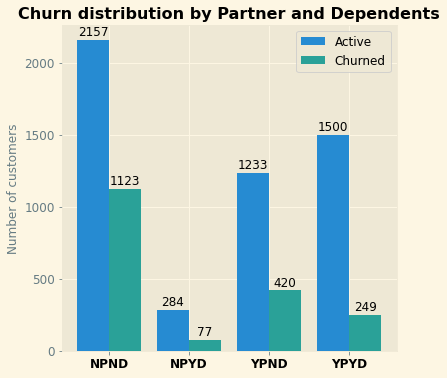

In [40]:
dataSet={}
dataSet["NPND"]=churn.loc[(churn['Partner']==0) & (churn['Dependents']==0),'Churn'].value_counts()
dataSet["NPYD"]=churn.loc[(churn['Partner']==0) & (churn['Dependents']==1),'Churn'].value_counts()
dataSet["YPND"]=churn.loc[(churn['Partner']==1) & (churn['Dependents']==0),'Churn'].value_counts()
dataSet["YPYD"]=churn.loc[(churn['Partner']==1) & (churn['Dependents']==1),'Churn'].value_counts()

PD = {"Active":[],"Churned":[]}

for key in dataSet:
    PD['Active'].append(dataSet[key][0])
    PD['Churned'].append(dataSet[key][1])



pd_df = pd.DataFrame.from_dict(PD)

index = np.arange(4)
bar_width=0.4

fig, ax = plt.subplots(figsize=(6,6))
ax.bar(index, pd_df['Active'], bar_width,label="Active")
ax.bar(index+bar_width, pd_df['Churned'],bar_width, label="Churned")

x=pd_df['Active'].value_counts().index.tolist()
y=pd_df['Churned'].value_counts().index.tolist()

for i in range(len(x)):
    ax.text(i, x[i]+30, x[i], ha = 'center')
    ax.text(i+bar_width, y[i]+30, y[i], ha = 'center')

ax.set_ylabel('Number of customers')
ax.set_title('Churn distribution by Partner and Dependents',color='black',fontweight='bold')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(dataSet.keys(),color='black',fontweight='bold')
ax.legend()

plt.show()

1.We find out those who have partners simultaneously dependents have higher loyalty to the company.

2.Having a partner is highly correlated with having dependents.

3.Customers who have partners and dependents possess opposite pattern than the customers who don't.

### Tenure distribution and Churn

Tenure frequencies of the customers

In [41]:
churn['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

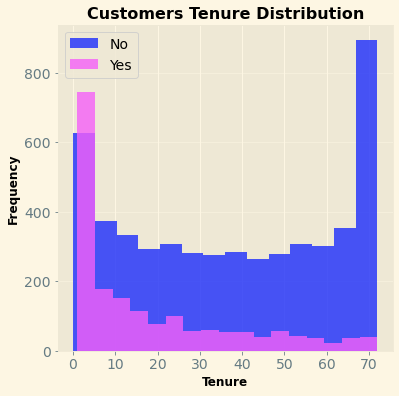

In [42]:
plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = '14'
plt.locator_params(axis='x', nbins=8)
churn[churn.Churn == 0]['tenure'].hist(bins='auto', color='#1C2DFC',alpha=0.8,label='No')
churn[churn.Churn == 1]['tenure'].hist(bins='auto', color='#F560F9',alpha=0.8,label='Yes')
plt.grid(axis='y', alpha=0.5)
plt.legend(loc=2)
plt.xlabel('Tenure',color='black',fontweight='bold')
plt.ylabel('Frequency',color='black',fontweight='bold')
plt.title('Customers Tenure Distribution',color='black',fontweight='bold')
plt.show()

In the distribution chart above, it appears that especially 1-10 has an extremely high churn rate.

##### New feature by Tenure
Divide the customers into tenure groups:

- 0-12 months
- 13-48 months
- 49-60 months
- 61+ months


In [43]:
churn['TenureGroup'] = None

In [44]:
churn.loc[(churn['tenure'] < 13),'TenureGroup'] = '0-12'
churn.loc[(churn['tenure'] >=13) & (churn['tenure'] < 49),'TenureGroup'] = '13-48'
churn.loc[(churn['tenure'] >=49) & (churn['tenure'] < 61),'TenureGroup'] = '49-60'
churn.loc[(churn['tenure'] >= 61),'TenureGroup'] = '61+'

#### Tenure Group distribution and churn

In [45]:
tenuregroup_distribution = churn.TenureGroup.value_counts(normalize=True).sort_index()
tenuregroup_distribution

0-12     0.310379
13-48    0.371717
49-60    0.118131
61+      0.199773
Name: TenureGroup, dtype: float64

In [46]:
churn.groupby('TenureGroup').agg({'Churn':['count',sum,'mean']})

Churn                
            count   sum      mean
TenureGroup                      
0-12         2186  1037  0.474382
13-48        2618   619  0.236440
49-60         832   120  0.144231
61+          1407    93  0.066098

In [47]:
churned_by_tenuregroup= churn.groupby('TenureGroup').Churn.mean()
tenuregroup_churn = pd.DataFrame({'TenureGroup_dist':tenuregroup_distribution, 'Churn_rate':churned_by_tenuregroup})
tenuregroup_churn

,TenureGroup_dist,Churn_rate
0-12,0.310379,0.474382
13-48,0.371717,0.236440
49-60,0.118131,0.144231
61+,0.199773,0.066098


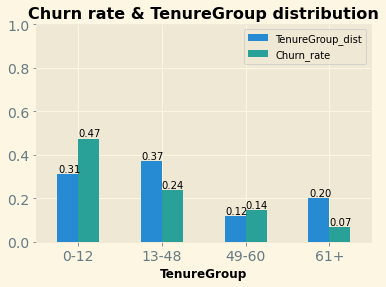

In [48]:
tenuregroup_churn.plot(kind='bar')
plt.xlabel('TenureGroup',color='black',fontweight='bold')

plt.ylim(0, 1)

y_pos = np.arange(len(tenuregroup_churn.index))
plt.xticks(y_pos,tenuregroup_churn.index,rotation=0)

x=tenuregroup_churn['TenureGroup_dist'].value_counts(normalize=True).index.tolist()
y=tenuregroup_churn['Churn_rate'].value_counts(normalize=True).index.tolist()

for i in range(len(x)):
    plt.text(i-0.11, x[i]+0.01, "{:.2f}".format(x[i]), ha = 'center',fontsize=10)
    plt.text(i+0.13, y[i]+0.01, "{:.2f}".format(y[i]), ha = 'center',fontsize=10)


plt.legend(fontsize=10)
plt.title('Churn rate & TenureGroup distribution',color='black',fontweight='bold')

plt.show()

Following the correlation chart, we created new variables of tenure group distribution and churn rate based on our new feature - tenure groups, which emphasizes the fact that recent customers are more likely to churn.

#### Tenure & Charges Distributions

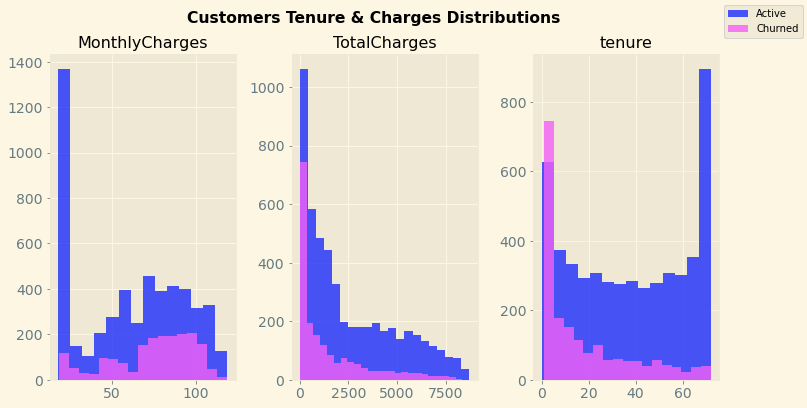

In [49]:
features = ['MonthlyCharges','TotalCharges','tenure']
fig,ax = plt.subplots(1, 3, figsize=(12,6))
plt.rcParams['font.size'] = '13'

churn[churn.Churn == 0][features].hist(bins='auto', color='#1C2DFC',alpha=0.8,ax=ax,label='No')

churn[churn.Churn == 1][features].hist(bins='auto', color='#F560F9',alpha=0.8,ax=ax,label='Yes')

    

plt.grid(axis='y', alpha=0.8)
fig.legend(['Active','Churned'],fontsize=10)

plt.suptitle('Customers Tenure & Charges Distributions',fontweight='bold')
plt.show()

From the plots above we can have three conclusions:<br>
1.tenure and MonthlyCharges are important features, they highly affect the churn rate. TotalCharges have a similar property for both.

2.Customers with higher MonthlyCharges are more likely to churn.

3.The longer a customer’s tenure, the less likely they are to cancel.

C:\Users\ellaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ellaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


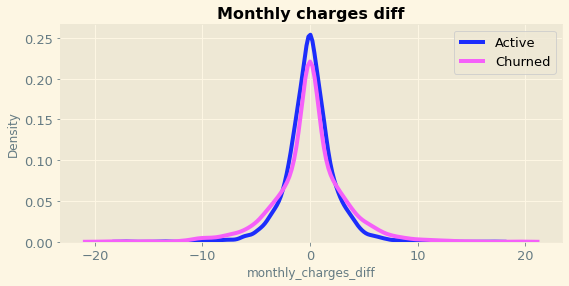

In [50]:
churn['total_charges_to_tenure_ratio'] = churn['TotalCharges'] / churn['tenure']

churn['monthly_charges_diff'] = churn['MonthlyCharges'] - churn['total_charges_to_tenure_ratio']


plt.figure(figsize=(9, 4))
plt.title("Monthly charges diff",fontweight='bold')

ax0 = sns.distplot(churn[churn['Churn'] == 0]['monthly_charges_diff'], hist=False, kde=True, 
                   color = '#1C2DFC',  label= 'Active', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

ax1 = sns.distplot(churn[churn['Churn'] == 1]['monthly_charges_diff'], hist=False, kde=True,
                   color = '#F560F9',  label= 'Churned',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})

plt.legend()
plt.show()


The plot above displays the difference between the MonthlyCharges and the TotalCharges divided by tenure to analyze whether the TotalCharges have different behavior than MonthlyCharges.
The distribution between the two is close to zero for all customers, therefore, TotalCharges is an unnecessary column.

### Services and Churn

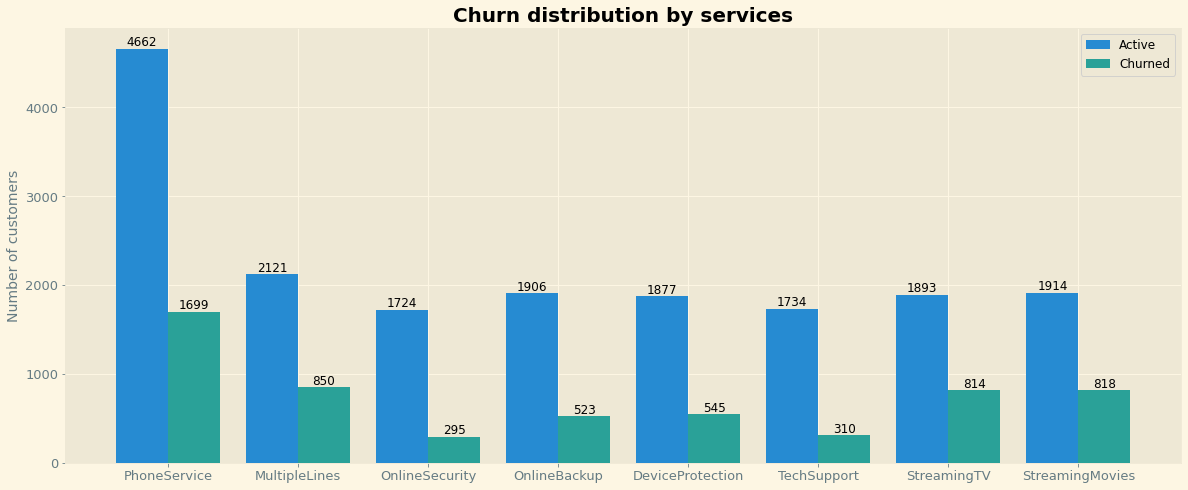

In [51]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.rcParams['font.size'] = '12'

services=["PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]

s = {"Active":[],"Churned":[]}

for i in services:
    churnedCustomer=churn[churn.Churn==1][i].value_counts()
    ActiveCustomer=churn[churn.Churn==0][i].value_counts()
    s['Active'].append(ActiveCustomer[1])
    s['Churned'].append(churnedCustomer[1])


s_df = pd.DataFrame.from_dict(s)

index = np.arange(len(services))
bar_width=0.4

ax.bar(index, s_df['Active'], bar_width,label="Active")
ax.bar(index+bar_width, s_df['Churned'],bar_width, label="Churned")

x=s_df['Active'].value_counts().index.tolist()
y=s_df['Churned'].value_counts().index.tolist()

for i in range(len(x)):
    ax.text(i, x[i]+30, x[i], ha = 'center')
    ax.text(i+bar_width, y[i]+30, y[i], ha = 'center')


ax.set_ylabel('Number of customers',fontsize=14)
ax.set_title('Churn distribution by services',fontweight='bold',fontsize=20)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(services)

ax.legend()

plt.show()


In [52]:
services=["PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]

for i in services:
    g_s=churn.groupby(i).agg({'Churn':['count',sum,'mean']})
    display(g_s)
    print(' ')

Churn                
             count   sum      mean
PhoneService                      
0              682   170  0.249267
1             6361  1699  0.267096

Churn                
              count   sum      mean
MultipleLines                      
0              4072  1019  0.250246
1              2971   850  0.286099

Churn                
               count   sum      mean
OnlineSecurity                      
0               5024  1574  0.313296
1               2019   295  0.146112

Churn                
             count   sum      mean
OnlineBackup                      
0             4614  1346  0.291721
1             2429   523  0.215315

Churn                
                 count   sum      mean
DeviceProtection                      
0                 4621  1324  0.286518
1                 2422   545  0.225021

Churn                
            count   sum      mean
TechSupport                      
0            4999  1559  0.311862
1            2044   310  0.151663

Churn                
            count   sum      mean
StreamingTV                      
0            4336  1055  0.243312
1            2707   814  0.300702

Churn                
                count   sum      mean
StreamingMovies                      
0                4311  1051  0.243795
1                2732   818  0.299414

Few customers don’t have phone service

Customers with OnlineSecurity/OnlineBackup/DeviceProtection/TechSupport are more unlikely to churn

MultipleLines and Streaming services is not predictive for churn

### InternetService

In [53]:
churn.groupby('InternetService').agg({'Churn':['count',sum,'mean']})

Churn                
                count   sum      mean
InternetService                      
DSL              2421   459  0.189591
Fiber optic      3096  1297  0.418928
No               1526   113  0.074050

Customers without internet have a very low churn rate.
Secondly, customers with fiber optic are three times more probable to churn than those with a DSL connection.

C:\Users\ellaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


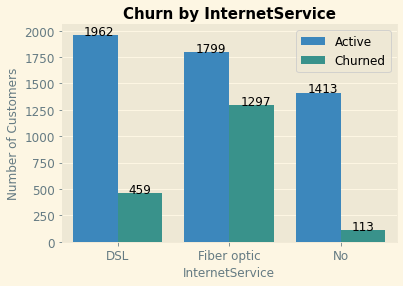

In [54]:
ax=sns.countplot("InternetService", data=churn, hue = 'Churn')

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+0.1))
    

plt.legend(labels=["Active","Churned"])

plt.ylabel('Number of Customers')
plt.title('Churn by InternetService',fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()

### InternetService grouped with services

In [55]:
services=["PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]

for i in services:
    ibs=churn.groupby(['InternetService',i]).agg({'Churn':['count',sum,'mean']})
    display(ibs)
    print(' ')

Churn                
                             count   sum      mean
InternetService PhoneService                      
DSL             0              682   170  0.249267
                1             1739   289  0.166187
Fiber optic     1             3096  1297  0.418928
No              1             1526   113  0.074050

Churn               
                              count  sum      mean
InternetService MultipleLines                     
DSL             0              1730  386  0.223121
                1               691   73  0.105644
Fiber optic     0              1158  530  0.457686
                1              1938  767  0.395769
No              0              1184  103  0.086993
                1               342   10  0.029240

Churn                
                               count   sum      mean
InternetService OnlineSecurity                      
DSL             0               1241   347  0.279613
                1               1180   112  0.094915
Fiber optic     0               2257  1114  0.493576
                1                839   183  0.218117
No              0               1526   113  0.074050

Churn               
                             count  sum      mean
InternetService OnlineBackup                     
DSL             0             1335  343  0.256929
                1             1086  116  0.106814
Fiber optic     0             1753  890  0.507701
                1             1343  407  0.303053
No              0             1526  113  0.074050

Churn               
                                 count  sum      mean
InternetService DeviceProtection                     
DSL             0                 1356  342  0.252212
                1                 1065  117  0.109859
Fiber optic     0                 1739  869  0.499712
                1                 1357  428  0.315402
No              0                 1526  113  0.074050

Churn                
                            count   sum      mean
InternetService TechSupport                      
DSL             0            1243   345  0.277554
                1            1178   114  0.096774
Fiber optic     0            2230  1101  0.493722
                1             866   196  0.226328
No              0            1526   113  0.074050

Churn               
                            count  sum      mean
InternetService StreamingTV                     
DSL             0            1464  332  0.226776
                1             957  127  0.132706
Fiber optic     0            1346  610  0.453195
                1            1750  687  0.392571
No              0            1526  113  0.074050

Churn               
                                count  sum      mean
InternetService StreamingMovies                     
DSL             0                1440  322  0.223611
                1                 981  137  0.139653
Fiber optic     0                1345  616  0.457993
                1                1751  681  0.388921
No              0                1526  113  0.074050

1. Customers who don't have InterntService don't purchase the majority of the services and have a lower churn rate than the rest of the customers with InterntService.<br>
2. Customers with DSL that joined the existing services have a lower churn rate than customers with FiberOptic that joined them.<br>
3. Customers who have internet service and have also subscribed to company services have a lower churn rate than those who have internet service but have chosen not to subscribe.

### Customer account info 

#### PaymentMethod

In [56]:
churn.groupby('PaymentMethod').agg({'Churn':['count',sum,'mean']})

Churn                
                          count   sum      mean
PaymentMethod                                  
Bank transfer (automatic)  1544   258  0.167098
Credit card (automatic)    1522   232  0.152431
Electronic check           2365  1071  0.452854
Mailed check               1612   308  0.191067

The preferred payment method is Electronic check, however this method has a very high churn rate.

The customers who pay by electronic check have an almost three times higher churn rate than other payment methods.

C:\Users\ellaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


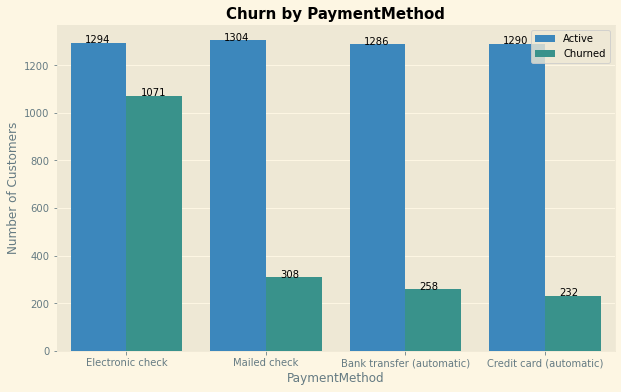

In [57]:
plt.figure(figsize=(10,6))
plt.rcParams['font.size'] = '10'
ax=sns.countplot("PaymentMethod", data=churn, hue = 'Churn')

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+0.01))

plt.legend(labels=["Active","Churned"],loc='upper right')

plt.ylabel('Number of Customers')
plt.title('Churn by PaymentMethod',fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()

#### SeniorCitizen & PaymentMethod

C:\Users\ellaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


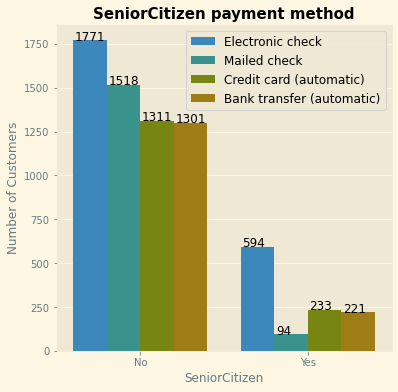

In [58]:
fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams['font.size'] = '12'
ax=sns.countplot("SeniorCitizen", data=churn, hue = 'PaymentMethod')

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.01, p.get_height()+0.1))

plt.legend(labels=["Electronic check","Mailed check","Credit card (automatic)","Bank transfer (automatic)"])

ax.set_xticklabels(["No", "Yes"])
plt.ylabel('Number of Customers')
plt.title('SeniorCitizen payment method',fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()

Surprisingly, younger customers prefer manual payment.

##### New feature by PaymentMethod

In [59]:
churn['AutoPayment'] = 0
churn.loc[(churn['PaymentMethod']=='Bank transfer (automatic)')| (churn['PaymentMethod']=='Credit card (automatic)'),'AutoPayment'] = 1

churn.groupby('AutoPayment').agg({'Churn':['count',sum,'mean']})

Churn                
            count   sum      mean
AutoPayment                      
0            3977  1379  0.346744
1            3066   490  0.159817

In [60]:
churn['ManualPayment'] = 0
churn.loc[(churn['PaymentMethod']=='Electronic check')| (churn['PaymentMethod']=='Mailed check'),'ManualPayment'] = 1

churn.groupby('ManualPayment').agg({'Churn':['count',sum,'mean']})

Churn                
              count   sum      mean
ManualPayment                      
0              3066   490  0.159817
1              3977  1379  0.346744

This feature strengthens the conclusion that customers with manual payment methods are more likely to churn.

#### PaperlessBilling

In [61]:
churn.groupby('PaperlessBilling').agg({'Churn':['count',sum,'mean']})

Churn                
                 count   sum      mean
PaperlessBilling                      
0                 2872   469  0.163301
1                 4171  1400  0.335651

Customers with paperless billing are more likely to churn.

C:\Users\ellaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


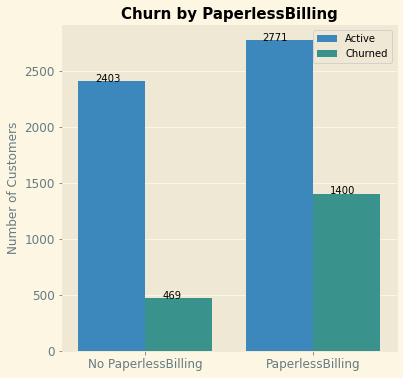

In [62]:
fig,ax = plt.subplots(figsize=(6,6))

plt.rcParams['font.size'] = '10'
ax=sns.countplot("PaperlessBilling", data=churn, hue = 'Churn')

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+0.1))

plt.legend(labels=["Active","Churned"])

ax.set_xticklabels(["No PaperlessBilling", "PaperlessBilling"])
plt.xlabel('')
plt.ylabel('Number of Customers')
plt.title('Churn by PaperlessBilling',fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()

#### Contract

In [63]:
churn.groupby('Contract').agg({'Churn':['count',sum,'mean']})

Churn                
               count   sum      mean
Contract                            
Month-to-month  3875  1655  0.427097
One year        1473   166  0.112695
Two year        1695    48  0.028319

C:\Users\ellaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


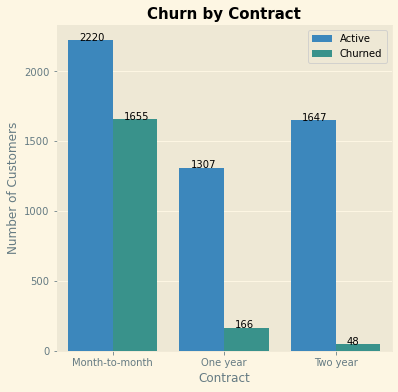

In [64]:
plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = '10'
ax=sns.countplot("Contract", data=churn, hue = 'Churn')

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+0.1))

plt.legend(labels=["Active","Churned"])

plt.ylabel('Number of Customers')
plt.title('Churn by Contract',fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()

Majority of the people’s contracts are M2M and these short term contracts have a higher churn rate.

Another fact that we find is that customers with yearly based contract has a higher loyalty for the company.

##### New feature by Contract
grouping all the customers who are not M2M contracts

In [65]:
churn['LongTermContract'] = 0
churn.loc[(churn['Contract']=='One year')| (churn['Contract']=='Two year'),'LongTermContract'] = 1

churn.groupby('LongTermContract').agg({'Churn':['count',sum,'mean']})

Churn                
                 count   sum      mean
LongTermContract                      
0                 3875  1655  0.427097
1                 3168   214  0.067551

The New Feature strengthens the fact that yearly based contract has a lower chances to churn.

In [66]:
longtermContract_distribution = churn.LongTermContract.value_counts(normalize=True).sort_index()
longtermContract_distribution

0    0.550192
1    0.449808
Name: LongTermContract, dtype: float64

In [67]:
churned_by_longtermContract= churn.groupby('LongTermContract').Churn.mean()
longtermContract_churn = pd.DataFrame({'LongTermContract_dist':longtermContract_distribution, 'Churn_rate':churned_by_longtermContract})
longtermContract_churn


,LongTermContract_dist,Churn_rate
0,0.550192,0.427097
1,0.449808,0.067551


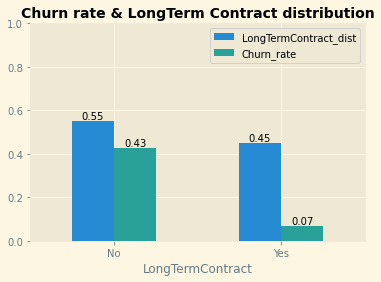

In [68]:
longtermContract_churn.plot(kind='bar')

bars = ('No', 'Yes')
y_pos = np.arange(len(bars))

plt.xlabel('LongTermContract',fontsize='12')

x=longtermContract_churn['LongTermContract_dist'].value_counts(normalize=True).index.tolist()
y=longtermContract_churn['Churn_rate'].value_counts(normalize=True).index.tolist()

for i in range(len(x)):
    plt.text(i-0.13, x[i]+0.01, "{:.2f}".format(x[i]), ha = 'center')
    plt.text(i+0.13, y[i]+0.01, "{:.2f}".format(y[i]), ha = 'center')

plt.ylim(0,1)

plt.xticks(y_pos,bars,rotation=0)
plt.title('Churn rate & LongTerm Contract distribution',fontsize='14',fontweight='bold')

plt.show()

Following the correlation chart and based on the new feature long-term contract, we created new variables of long-term contract distribution and churn rate, which emphasizes the fact that customers with short-term contracts are less committed to the company (42 percent churn rate).

##### New feature by SeniorCitizen & Contract
cross-check of the younger generation with contract type

In [69]:
churn['YoungNotEngaged'] = 0

churn.loc[(churn['SeniorCitizen']==0) & (churn['LongTermContract']==0),'YoungNotEngaged']=1
churn.groupby('YoungNotEngaged').agg({'Churn':['count',sum,'mean']})

Churn                
                count   sum      mean
YoungNotEngaged                      
0                3975   655  0.164780
1                3068  1214  0.395698

The younger generation with the M2M contract is more likely to churn

Remove Features:

In [70]:
churn = churn.drop(['gender','tenure','TotalCharges','PaymentMethod','Contract'], axis=1)
churn

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MonthlyCharges,Churn,LivingAlone,TenureGroup,total_charges_to_tenure_ratio,monthly_charges_diff,AutoPayment,ManualPayment,LongTermContract,YoungNotEngaged
0,0,1,0,0,0,DSL,0,1,0,0,...,29.85,0,0,0-12,29.850000,0.000000,0,1,0,1
1,0,0,0,1,0,DSL,1,0,1,0,...,56.95,0,1,13-48,55.573529,1.376471,0,1,1,0
2,0,0,0,1,0,DSL,1,1,0,0,...,53.85,1,1,0-12,54.075000,-0.225000,0,1,0,1
3,0,0,0,0,0,DSL,1,0,1,1,...,42.30,0,1,13-48,40.905556,1.394444,1,0,1,0
4,0,0,0,1,0,Fiber optic,0,0,0,0,...,70.70,1,1,0-12,75.825000,-5.125000,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,1,DSL,1,0,1,1,...,84.80,0,0,13-48,82.937500,1.862500,0,1,1,0
7039,0,1,1,1,1,Fiber optic,0,1,1,0,...,103.20,0,0,61+,102.262500,0.937500,1,0,1,0
7040,0,1,1,0,0,DSL,1,0,0,0,...,29.60,0,0,0-12,31.495455,-1.895455,0,1,0,1
7041,1,1,0,1,1,Fiber optic,0,0,0,0,...,74.40,1,0,0-12,76.650000,-2.250000,0,1,0,0


Following features have been removed as a result of our analysis and the addition of new features:<br>
1.Gender - the churn rate is distributed evenly between genders and equal to the general rate. For that reason, it's not an essential feature for our study.<br>
2.Tenure - because we created a new feature by grouping customer tenure, the tenure column is no longer necessary.<br>
3.TotalCharges - We found that total charges do not differ from monthly charges, thus total charges aren't a necessary feature.<br>
4.PaymentMethod -  we created a new feature by dividing payment methods into two groups, therefore, the payment method column is unnecessary.<br>
5.Contract - we created a new feature by grouping the long-term contracts (one-year and two-year contracts). The contract column has become redundant due to this new feature.


# Data Mining & Machine Learning

#### Algorithms in use:

  * Random Forest
  * Decision Tree
  * Knn

#### Our purpose is to predict which customers will churn based on our features

In [71]:
churn_ml = churn_ml.drop(['PaymentMethod','Contract'], axis=1)

new_columns=['AutoPayment','ManualPayment','LongTermContract']

for i in new_columns:
    churn_ml[i]=churn[i]

churn_ml = churn_ml.rename(columns=str.lower)

churn_ml.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'paperlessbilling', 'monthlycharges', 'totalcharges',
       'churn', 'autopayment', 'manualpayment', 'longtermcontract'],
      dtype='object')

In [72]:
churn_ml.dtypes

gender               object
seniorcitizen         int64
partner               int64
dependents            int64
tenure                int64
                     ...   
totalcharges        float64
churn                 int64
autopayment           int64
manualpayment         int64
longtermcontract      int64
Length: 21, dtype: object

In [73]:
churn_ml = pd.get_dummies(churn_ml)

In [74]:
churn_ml = churn_ml.astype(float)
churn_ml.dtypes

seniorcitizen                  float64
partner                        float64
dependents                     float64
tenure                         float64
phoneservice                   float64
                                ...   
gender_Female                  float64
gender_Male                    float64
internetservice_DSL            float64
internetservice_Fiber optic    float64
internetservice_No             float64
Length: 24, dtype: object

In [75]:
churn_ml.insert(0,'customerID',custid)

In [76]:
test_size = 1400
train, test = train_test_split(churn_ml, test_size=test_size, random_state=0, shuffle=True)

label = 'churn'
ctid = 'customerID'

x_train = train.drop(label, axis=1)
x_train = x_train.drop(ctid, axis=1)
y_train = train[label]
ctid_train = train[ctid]

x_test = test.drop(label, axis=1)
x_test = x_test.drop(ctid, axis=1) ### New
y_test = test[label]
ctid_test = test[ctid]

In [77]:
x_train.shape, y_train.shape, ctid_train.shape, x_test.shape, y_test.shape, ctid_test.shape

((5643, 23), (5643,), (5643,), (1400, 23), (1400,), (1400,))

## Decision Tree

In [78]:
clf = DecisionTreeClassifier(max_depth=3)


clf.fit(x_train, y_train)

y_test_pred_DecisionTree = clf.predict(x_test)


output_DT = pd.DataFrame({'customerid': ctid_test, 'churn_actual_label':y_test, 'churn_predicted_label': y_test_pred_DecisionTree})
output_DT

,customerid,churn_actual_label,churn_predicted_label
2200,6296-DDOOR,0.0,0.0
4627,3680-CTHUH,0.0,0.0
3225,4931-TRZWN,0.0,0.0
2828,8559-WNQZS,0.0,0.0
3768,3537-HPKQT,0.0,0.0
...,...,...,...
413,5973-EJGDP,0.0,0.0
914,6024-RUGGH,0.0,0.0
1330,0661-WCQNQ,0.0,0.0
3976,5261-QSHQM,1.0,0.0


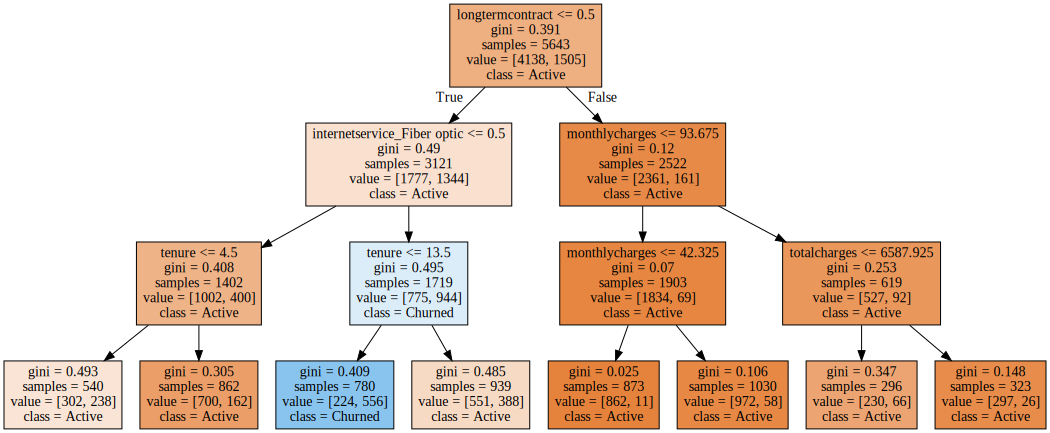

In [79]:
def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

plot_tree(clf, x_train.columns, ['Active','Churned'])

### Decision Tree Accuracy

In [80]:
test_DT_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_DT_acc

0.7792857142857142

#### Optimal Number of max_depth for Decision Tree Model

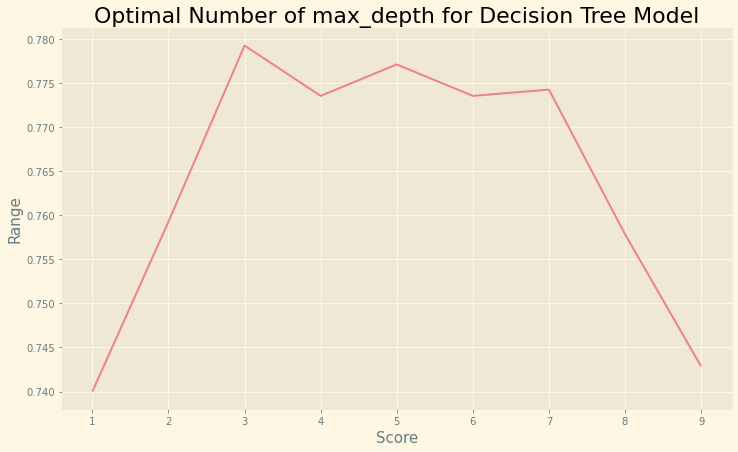

In [81]:
score_array = []

for i in range(1,10):
    dt_loop = DecisionTreeClassifier(max_depth=i) 
    dt_loop.fit(x_train,y_train)
    score_array.append(dt_loop.score(x_test,y_test))

plt.figure(figsize=(12, 7))

plt.plot(range(1,10),score_array, color = '#ec838a')


plt.ylabel('Range',horizontalalignment="center",fontstyle = "normal", fontsize = "15")
plt.xlabel('Score',horizontalalignment="center",fontstyle = "normal", fontsize = "15")
plt.title('Optimal Number of max_depth for Decision Tree Model',horizontalalignment="center", fontstyle = "normal", fontsize = "22")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

##### optimal number of max_depth =3

### Overfitting in Decision Tree

In [82]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_DT_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_DT_acc

0.7771428571428571

In [83]:
clf = DecisionTreeClassifier(max_depth=7)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_DT_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_DT_acc

0.7728571428571429

In [84]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_DT_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_DT_acc

0.7792857142857142

##### max_depth=3 --> the best one

## Random Forest model

In [85]:
model = RandomForestClassifier(n_estimators=44, max_depth=9, random_state=1)

            
model.fit(x_train, y_train)

y_test_pred_RandomForest = model.predict(x_test)

output_RF = pd.DataFrame({'customerid': ctid_test, 'churn_actual_label':y_test, 'churn_predicted_label': y_test_pred_RandomForest})
output_RF

,customerid,churn_actual_label,churn_predicted_label
2200,6296-DDOOR,0.0,0.0
4627,3680-CTHUH,0.0,0.0
3225,4931-TRZWN,0.0,0.0
2828,8559-WNQZS,0.0,0.0
3768,3537-HPKQT,0.0,0.0
...,...,...,...
413,5973-EJGDP,0.0,0.0
914,6024-RUGGH,0.0,0.0
1330,0661-WCQNQ,0.0,0.0
3976,5261-QSHQM,1.0,0.0


### Random Forest Accuracy

In [86]:
test_RF_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_RF_acc

0.8007142857142857

#### Optimal Number of n_estimators & max_depth for Random Forest Model

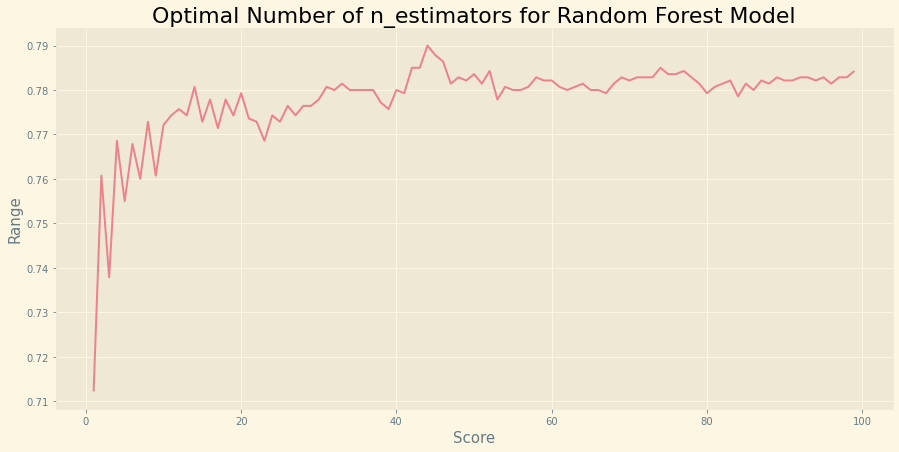

In [87]:
score_array = []

for i in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = i, random_state = 1) 
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))

plt.figure(figsize=(15, 7))

plt.plot(range(1,100),score_array, color = '#ec838a')


plt.ylabel('Range',horizontalalignment="center",fontstyle = "normal", fontsize = "15")
plt.xlabel('Score',horizontalalignment="center",fontstyle = "normal", fontsize = "15")
plt.title('Optimal Number of n_estimators for Random Forest Model',horizontalalignment="center", fontstyle = "normal", fontsize = "22")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

##### optimal number of n_estimators =44

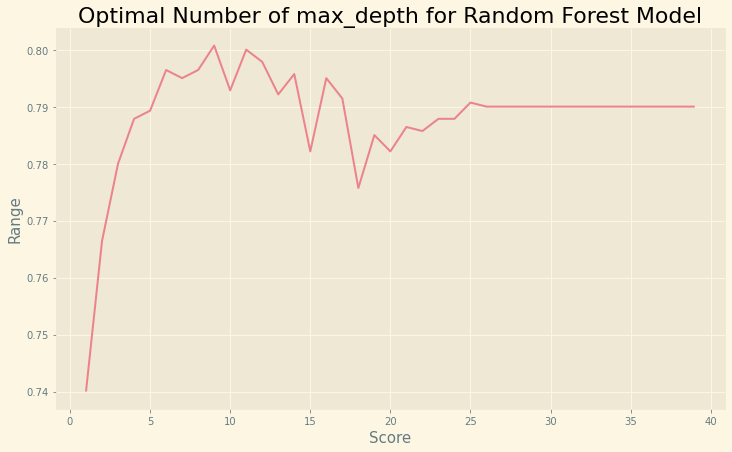

In [88]:
score_array = []

for i in range(1,40):
    rf_loop = RandomForestClassifier(n_estimators = 44,max_depth=i, random_state = 1) 
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))

plt.figure(figsize=(12, 7))

plt.plot(range(1,40),score_array, color = '#ec838a')


plt.ylabel('Range',horizontalalignment="center",fontstyle = "normal", fontsize = "15")
plt.xlabel('Score',horizontalalignment="center",fontstyle = "normal", fontsize = "15")
plt.title('Optimal Number of max_depth for Random Forest Model',horizontalalignment="center", fontstyle = "normal", fontsize = "22")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

##### optimal number of trees depth = 9

In [89]:
feature_importances = model.feature_importances_
features = x_train.columns
stats = pd.DataFrame({'Feature':features, 'Importance':feature_importances})
stats.sort_values('Importance', ascending=False) 

,Feature,Importance
3,tenure,0.183554
14,totalcharges,0.158387
17,longtermcontract,0.139152
13,monthlycharges,0.115741
21,internetservice_Fiber optic,0.090528
...,...,...
8,deviceprotection,0.011297
11,streamingmovies,0.011240
18,gender_Female,0.010295
19,gender_Male,0.010167


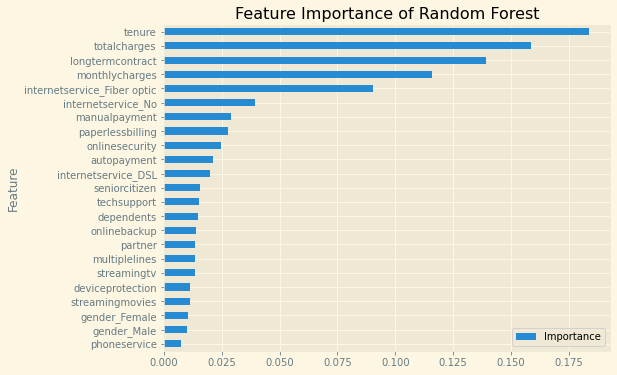

In [90]:
plt.rcParams["figure.figsize"] = (8,6)
stats_sort = stats.sort_values('Importance', ascending=True)
stats_sort.plot(y='Importance', x='Feature', kind='barh')
plt.title('Feature Importance of Random Forest')
plt.show()

### Overfitting in Random Forest

In [91]:
model = RandomForestClassifier(n_estimators=19, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_RF_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_RF_acc

0.7742857142857142

In [92]:
model = RandomForestClassifier(n_estimators=35, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_RF_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_RF_acc

0.78

In [93]:
model = RandomForestClassifier(n_estimators=44, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_RF_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_RF_acc

0.79

In [94]:
model = RandomForestClassifier(n_estimators=10, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_RF_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_RF_acc

0.7721428571428571

In [95]:
model = RandomForestClassifier(n_estimators=15, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_RF_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_RF_acc

0.7728571428571429

##### "n_estimators" should be about 44
checking max_depth

In [96]:
model = RandomForestClassifier(n_estimators=44, max_depth=25, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_RF_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_RF_acc

0.7907142857142857

In [97]:
model = RandomForestClassifier(n_estimators=44, max_depth=35, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_RF_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_RF_acc

0.79

In [98]:
model = RandomForestClassifier(n_estimators=44, max_depth=18, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_RF_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_RF_acc

0.7757142857142857

In [99]:
model = RandomForestClassifier(n_estimators=44, max_depth=12, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_RF_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_RF_acc

0.7978571428571428

In [100]:
model = RandomForestClassifier(n_estimators=44, max_depth=9, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_RF_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_RF_acc

0.8007142857142857

##### "n_estimators=44" & "max_depth=9" is a pretty good fit ~ 80%

## KNN - K Nearest Neighbors

In [101]:
clf = KNeighborsClassifier(n_neighbors=23)
        
clf.fit(x_train, y_train)

y_test_pred_Knn = clf.predict(x_test)

output_KNN = pd.DataFrame({'customerid': ctid_test, 'churn_actual_label':y_test, 'churn_predicted_label': y_test_pred_Knn})
output_KNN

,customerid,churn_actual_label,churn_predicted_label
2200,6296-DDOOR,0.0,0.0
4627,3680-CTHUH,0.0,0.0
3225,4931-TRZWN,0.0,0.0
2828,8559-WNQZS,0.0,0.0
3768,3537-HPKQT,0.0,0.0
...,...,...,...
413,5973-EJGDP,0.0,0.0
914,6024-RUGGH,0.0,0.0
1330,0661-WCQNQ,0.0,0.0
3976,5261-QSHQM,1.0,0.0


### KNN Accuracy

In [102]:
test_KNN_acc = accuracy_score(y_test, y_test_pred_Knn)
test_KNN_acc

0.7828571428571428

### Optimal Number of K Nearest Neighbors

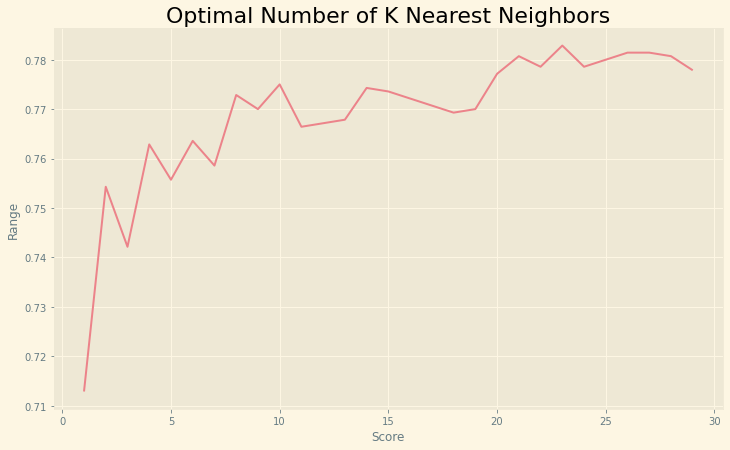

In [103]:
score_array = []
for i in range(1,30):
    knn_loop = KNeighborsClassifier(n_neighbors = i)
    knn_loop.fit(x_train,y_train)
    score_array.append(knn_loop.score(x_test,y_test))

fig = plt.figure(figsize=(12, 7))
plt.plot(range(1,30),score_array, color = '#ec838a')


plt.ylabel('Range',fontstyle = "normal", fontsize = "large")
plt.xlabel('Score',fontstyle = "normal", fontsize = "large")
plt.title('Optimal Number of K Nearest Neighbors',horizontalalignment="center", fontstyle = "normal", fontsize = "22")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

##### optimal number of K neigbors = 23

### Overfitting in KNN

In [104]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_KNN_acc = accuracy_score(y_test, y_test_pred_Knn)
test_KNN_acc

0.7557142857142857

In [105]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_KNN_acc = accuracy_score(y_test, y_test_pred_Knn)
test_KNN_acc

0.7664285714285715

In [106]:
clf = KNeighborsClassifier(n_neighbors=29)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_KNN_acc = accuracy_score(y_test, y_test_pred_Knn)
test_KNN_acc

0.7778571428571428

In [107]:
clf = KNeighborsClassifier(n_neighbors=18)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_KNN_acc = accuracy_score(y_test, y_test_pred_Knn)
test_KNN_acc

0.7692857142857142

In [108]:
clf = KNeighborsClassifier(n_neighbors=23)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_KNN_acc = accuracy_score(y_test, y_test_pred_Knn)
test_KNN_acc

0.7828571428571428

#### KNN can highly suffer from features that are in different scales
scaling x values

In [109]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

clf = KNeighborsClassifier(n_neighbors=23)
clf.fit(x_train_scaled, y_train)

y_test_pred_Knn_Scaled = clf.predict(x_test_scaled)


output = pd.DataFrame({'customerid': ctid_test, 'churn_actual_label':y_test, 'churn_predicted_label': y_test_pred_Knn, 'churn_predicted_label_scaled':y_test_pred_Knn_Scaled})
output


test_KNNS_acc = accuracy_score(y_test, y_test_pred_Knn_Scaled)
test_KNNS_acc

0.7864285714285715

### Benchmark

In [110]:
y_train.value_counts()

0.0    4138
1.0    1505
Name: churn, dtype: int64

##### The benchmark would be the most common label in the train set

##### In our train set it's 0 (Active), checking its performance on both train and test

In [111]:
def get_benchmark_predictions(x, benchmark_value):
    return np.ones(len(x))*benchmark_value
    

benchmark_value = 0

y_test_pred_Benchmark = get_benchmark_predictions(x_test, benchmark_value)
y_test_pred_Benchmark

array([0., 0., 0., ..., 0., 0., 0.])

In [112]:
test_acc = accuracy_score(y_test, y_test_pred_Benchmark)
test_acc

0.74

### Our model results:
Decision tree best accuracy Result: 77.92%<br>
Random Forest best accuracy Result: 80%<br>
Knn best accuracy Result (before standardization): 78.28%<br>
Knn best accuracy Result (after standardization): 78.64%<br>
##### The performance on test is 74%, we can see, that any of our algorithms beat the benchmark performance